In [3]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [4]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv('/content/cleaned_flights_dataset.csv')
df.head()

,quarter,month,date,day,departure_category,sched_dep_hour,sched_dep_minute,act_dep_hour,act_dep_minute,arrival_category,sched_arr_hour,sched_arr_minute,act_arr_hour,act_arr_minute,full_minutes,airtime_hours,airtime_minutes,delay_dep_category,delay_departure_minutes,early_dep_category,early_departure_minutes,departure_status,origin_airport_code,origin_city,origin_state,dest_airport_code,dest_city,dest_state,distance,airline,delay_arr_category,delay_arrival_minutes,early_arr_category,early_arrival_minutes,arrival_status
0,Q1,1,1,Tuesday,Early Morning,5,15,5,17,Morning,8,19,8,30,193,3,13,Minor Delay,2.0,No Early,0.0,Delayed,EWR,Newark,New Jersey,IAH,Houston,Texas,1400,United Air Lines Inc.,Minor Delay,11.0,No Early,0.0,Delayed
1,Q1,1,1,Tuesday,Early Morning,5,29,5,33,Morning,8,30,8,50,197,3,17,Minor Delay,4.0,No Early,0.0,Delayed,LGA,New York City,New York,IAH,Houston,Texas,1416,United Air Lines Inc.,Minor Delay,20.0,No Early,0.0,Delayed
2,Q1,1,1,Tuesday,Early Morning,5,40,5,42,Morning,8,50,9,23,221,3,41,Minor Delay,2.0,No Early,0.0,Delayed,JFK,New York City,New York,MIA,Miami,Florida,1089,American Airlines Inc.,Moderate Delay,33.0,No Early,0.0,Delayed
3,Q1,1,1,Tuesday,Early Morning,5,45,5,44,Morning,10,22,10,4,260,4,20,No Delay,0.0,Minor Early,1.0,Early,JFK,New York City,New York,BQN,Aguadilla,Puerto Rico,1576,JetBlue Airways,No Delay,0.0,Minor Early,18.0,Early
4,Q1,1,1,Tuesday,Early Morning,5,58,5,54,Morning,7,28,7,40,106,1,46,No Delay,0.0,Minor Early,4.0,Early,EWR,Newark,New Jersey,ORD,Chicago,Illinois,719,United Air Lines Inc.,Minor Delay,12.0,No Early,0.0,Delayed


In [8]:
df.shape

(336776, 35)

In [9]:
df.columns

Index(['quarter', 'month', 'date', 'day', 'departure_category',
       'sched_dep_hour', 'sched_dep_minute', 'act_dep_hour', 'act_dep_minute',
       'arrival_category', 'sched_arr_hour', 'sched_arr_minute',
       'act_arr_hour', 'act_arr_minute', 'full_minutes', 'airtime_hours',
       'airtime_minutes', 'delay_dep_category', 'delay_departure_minutes',
       'early_dep_category', 'early_departure_minutes', 'departure_status',
       'origin_airport_code', 'origin_city', 'origin_state',
       'dest_airport_code', 'dest_city', 'dest_state', 'distance', 'airline',
       'delay_arr_category', 'delay_arrival_minutes', 'early_arr_category',
       'early_arrival_minutes', 'arrival_status'],
      dtype='object')

In [10]:
df = df.drop(
      columns=['quarter',
               'day',
               'departure_category',
               'act_dep_hour',
               'act_dep_minute',
               'arrival_category',
               'act_arr_hour',
               'act_arr_minute',
               'full_minutes',
               'airtime_hours',
               'airtime_minutes',
               'delay_dep_category',
               'delay_departure_minutes',
               'early_dep_category',
               'early_departure_minutes',
               'departure_status',
               'origin_city', 'origin_state',
               'dest_city', 'dest_state', 'distance',
               'delay_arr_category', 'delay_arrival_minutes', 'early_arr_category',
               'early_arrival_minutes'])  # Example of dropping irrelevant columns

In [11]:
df.head()

,month,date,sched_dep_hour,sched_dep_minute,sched_arr_hour,sched_arr_minute,origin_airport_code,dest_airport_code,airline,arrival_status
0,1,1,5,15,8,19,EWR,IAH,United Air Lines Inc.,Delayed
1,1,1,5,29,8,30,LGA,IAH,United Air Lines Inc.,Delayed
2,1,1,5,40,8,50,JFK,MIA,American Airlines Inc.,Delayed
3,1,1,5,45,10,22,JFK,BQN,JetBlue Airways,Early
4,1,1,5,58,7,28,EWR,ORD,United Air Lines Inc.,Delayed


In [12]:
df.shape

(336776, 10)

In [13]:
df['arrival_status'].value_counts()

,count
arrival_status,
Early,188173
Delayed,134331
Cancelled,8863
On Time,5409


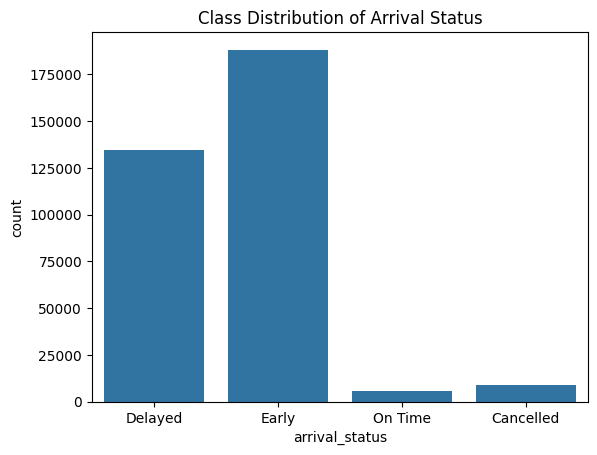

In [14]:
# Imbalanced data
sns.countplot(x='arrival_status', data=df)
plt.title('Class Distribution of Arrival Status')
plt.show()

# **Baseline Random Forest ---> Hyperparameter**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold

In [16]:
# 1.Data Preparation
X = df.drop('arrival_status', axis=1)
y = df['arrival_status']

In [17]:
# 2.Encoding Categorical Features using OneHotEncoder
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(X[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, encoded_df], axis=1)

In [18]:
X

,month,date,sched_dep_hour,sched_dep_minute,sched_arr_hour,sched_arr_minute,origin_airport_code_EWR,origin_airport_code_JFK,origin_airport_code_LGA,dest_airport_code_ABQ,dest_airport_code_ACK,dest_airport_code_ALB,dest_airport_code_ANC,dest_airport_code_ATL,dest_airport_code_AUS,dest_airport_code_AVL,dest_airport_code_BDL,dest_airport_code_BGR,dest_airport_code_BHM,dest_airport_code_BNA,dest_airport_code_BOS,dest_airport_code_BQN,dest_airport_code_BTV,dest_airport_code_BUF,dest_airport_code_BUR,dest_airport_code_BWI,dest_airport_code_BZN,dest_airport_code_CAE,dest_airport_code_CAK,dest_airport_code_CHO,dest_airport_code_CHS,dest_airport_code_CLE,dest_airport_code_CLT,dest_airport_code_CMH,dest_airport_code_CRW,dest_airport_code_CVG,dest_airport_code_DAY,dest_airport_code_DCA,dest_airport_code_DEN,dest_airport_code_DFW,dest_airport_code_DSM,dest_airport_code_DTW,dest_airport_code_EGE,dest_airport_code_EYW,dest_airport_code_FLL,dest_airport_code_GRR,dest_airport_code_GSO,dest_airport_code_GSP,dest_airport_code_HDN,dest_airport_code_HNL,dest_airport_code_HOU,dest_airport_code_IAD,dest_airport_code_IAH,dest_airport_code_ILM,dest_airport_code_IND,dest_airport_code_JAC,dest_airport_code_JAX,dest_airport_code_LAS,dest_airport_code_LAX,dest_airport_code_LEX,dest_airport_code_LGA,dest_airport_code_LGB,dest_airport_code_MCI,dest_airport_code_MCO,dest_airport_code_MDW,dest_airport_code_MEM,dest_airport_code_MHT,dest_airport_code_MIA,dest_airport_code_MKE,dest_airport_code_MSN,dest_airport_code_MSP,dest_airport_code_MSY,dest_airport_code_MTJ,dest_airport_code_MVY,dest_airport_code_MYR,dest_airport_code_OAK,dest_airport_code_OKC,dest_airport_code_OMA,dest_airport_code_ORD,dest_airport_code_ORF,dest_airport_code_PBI,dest_airport_code_PDX,dest_airport_code_PHL,dest_airport_code_PHX,dest_airport_code_PIT,dest_airport_code_PSE,dest_airport_code_PSP,dest_airport_code_PVD,dest_airport_code_PWM,dest_airport_code_RDU,dest_airport_code_RIC,dest_airport_code_ROC,dest_airport_code_RSW,dest_airport_code_SAN,dest_airport_code_SAT,dest_airport_code_SAV,dest_airport_code_SBN,dest_airport_code_SDF,dest_airport_code_SEA,dest_airport_code_SFO,dest_airport_code_SJC,dest_airport_code_SJU,dest_airport_code_SLC,dest_airport_code_SMF,dest_airport_code_SNA,dest_airport_code_SRQ,dest_airport_code_STL,dest_airport_code_STT,dest_airport_code_SYR,dest_airport_code_TPA,dest_airport_code_TUL,dest_airport_code_TVC,dest_airport_code_TYS,dest_airport_code_XNA,airline_AirTran Airways Corporation,airline_Alaska Airlines Inc.,airline_American Airlines Inc.,airline_Delta Air Lines Inc.,airline_Endeavor Air Inc.,airline_Envoy Air,airline_ExpressJet Airlines Inc.,airline_Frontier Airlines Inc.,airline_Hawaiian Airlines Inc.,airline_JetBlue Airways,airline_Mesa Airlines Inc.,airline_SkyWest Airlines Inc.,airline_Southwest Airlines Co.,airline_US Airways Inc.,airline_United Air Lines Inc.,airline_Virgin America
0,1,1,5,15,8,19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,5,29,8,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,5,40,8,50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [19]:
# 3.Encoding Target Variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
y_encoded

array([1, 1, 1, ..., 1, 2, 2])

In [21]:
# 4.Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# 5.Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [23]:
# 6.Handling Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
X_resampled_df = pd.DataFrame(X_train_resampled)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['arrival_status'])

In [25]:
X_resampled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
0,-1.332135,-1.107451,0.604927,-1.099959,0.387867,1.432920,-0.748047,1.423521,-0.671497,-0.027473,-0.028062,-0.036128,-0.004874,-0.232101,-0.085411,-0.028587,-0.036293,-0.033388,-0.02971,7.223431,-0.219707,-0.051649,-0.088018,-0.118724,-0.033209,-0.072914,-0.01034,-0.018562,-0.050716,-0.012427,-0.092938,-0.117327,-0.208760,-0.102833,-0.020247,-0.108815,-0.067445,-0.172257,-0.148496,-0.163209,-0.041139,-0.169301,-0.025157,-0.007105,-0.192676,-0.047715,-0.069221,-0.050273,-0.006674,-0.045866,-0.079497,-0.131212,-0.147784,-0.018076,-0.078775,-0.008616,-0.090235,-0.134647,-0.224608,-0.001723,-0.001723,-0.044581,-0.077448,-0.208899,-0.111193,-0.073079,-0.054818,-0.18995,-0.091596,-0.041247,-0.147647,-0.106814,-0.006674,-0.025625,-0.013237,-0.030451,-0.032069,-0.050273,-0.232583,-0.067689,-0.14088,-0.063535,-0.069782,-0.118402,-0.092792,-0.032939,-0.007511,-0.033432,-0.083863,-0.15761,-0.085675,-0.085004,-0.103024,-0.090519,-0.045179,-0.048919,-0.005449,-0.058714,-0.108563,-0.203016,-0.031271,-0.132598,-0.085903,-0.029052,-0.049555,-0.060074,-0.114246,-0.0394,-0.072502,-0.150571,-0.030598,-0.01732,-0.043326,-0.055549,-0.098867,-0.046093,-0.328092,-0.408244,4.152536,-0.291629,-0.437828,-0.045146,-0.031883,-0.440050,-0.042282,-0.009748,-0.194492,-0.254829,-0.459283,-0.124765
1,1.010847,1.287460,1.463055,-1.359015,1.193165,0.170048,-0.748047,-0.702484,1.489211,-0.027473,-0.028062,-0.036128,-0.004874,-0.232101,-0.085411,-0.028587,-0.036293,-0.033388,-0.02971,-0.138438,-0.219707,-0.051649,-0.088018,-0.118724,-0.033209,-0.072914,-0.01034,-0.018562,-0.050716,-0.012427,-0.092938,-0.117327,-0.208760,-0.102833,-0.020247,-0.108815,-0.067445,-0.172257,-0.148496,-0.163209,-0.041139,-0.169301,-0.025157,-0.007105,-0.192676,-0.047715,-0.069221,-0.050273,-0.006674,-0.045866,-0.079497,-0.131212,-0.147784,-0.018076,-0.078775,-0.008616,-0.090235,-0.134647,-0.224608,-0.001723,-0.001723,-0.044581,-0.077448,-0.208899,-0.111193,-0.073079,-0.054818,-0.18995,-0.091596,-0.041247,-0.147647,-0.106814,-0.006674,-0.025625,-0.013237,-0.030451,-0.032069,-0.050273,4.299531,-0.067689,-0.14088,-0.063535,-0.069782,-0.118402,-0.092792,-0.032939,-0.007511,-0.033432,-0.083863,-0.15761,-0.085675,-0.085004,-0.103024,-0.090519,-0.045179,-0.048919,-0.005449,-0.058714,-0.108563,-0.203016,-0.031271,-0.132598,-0.085903,-0.029052,-0.049555,-0.060074,-0.114246,-0.0394,-0.072502,-0.150571,-0.030598,-0.01732,-0.043326,-0.055549,-0.098867,-0.046093,-0.328092,-0.408244,-0.240817,-0.291629,-0.437828,-0.045146,-0.031883,-0.440050,-0.042282,-0.009748,-0.194492,-0.254829,2.177306,-0.124765
2,1.010847,0.945330,-0.896797,0.143512,-0.820081,-0.002161,-0.748047,-0.702484,1.489211,-0.027473,-0.028062,-0.036128,-0.004874,-0.232101,-0.085411,-0.028587,-0.036293,-0.033388,-0.02971,-0.138438,-0.219707,-0.051649,-0.088018,-0.118724,-0.033209,-0.072914,-0.01034,-0.018562,-0.050716,-0.012427,-0.092938,-0.117327,4.790194,-0.102833,-0.020247,-0.108815,-0.067445,-0.172257,-0.148496,-0.163209,-0.041139,-0.169301,-0.025157,-0.007105,-0.192676,-0.047715,-0.069221,-0.050273,-0.006674,-0.045866,-0.079497,-0.131212,-0.147784,-0.018076,-0.078775,-0.008616,-0.090235,-0.134647,-0.224608,-0.001723,-0.001723,-0.044581,-0.077448,-0.208899,-0.111193,-0.073079,-0.054818,-0.18995,-0.091596,-0.041247,-0.147647,-0.106814,-0.006674,-0.025625,-0.013237,-0.030451,-0.032069,-0.050273,-0.232583,-0.067689,-0.14088,-0.063535,-0.069782,-0.118402,-0.092792,-0.032939,-0.007511,-0.033432,-0.083863,-0.15761,-0.085675,-0.085004,-0.103024,-0.090519,-0.045179,-0.048919,-0.005449,-0.058714,-0.108563,-0.203016,-0.031271,-0.132598,-0.

In [26]:
y_resampled_df

,arrival_status
0,2
1,2
2,1
3,1
4,2
...,...
601895,3
601896,3
601897,3
601898,3


In [27]:
print(label_encoder.classes_)

['Cancelled' 'Delayed' 'Early' 'On Time']


In [28]:
y_resampled_df.value_counts()

,count
arrival_status,
0,150475
1,150475
2,150475
3,150475


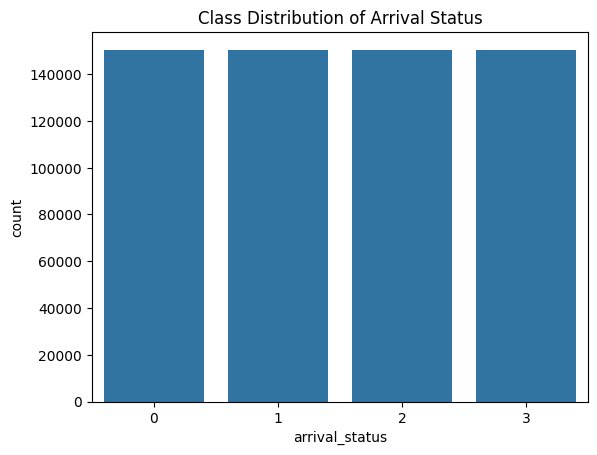

In [29]:
# Balanced data
sns.countplot(x='arrival_status', data=y_resampled_df)
plt.title('Class Distribution of Arrival Status')
plt.show()

In [27]:
# 7.Model Training: Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [28]:
# 8.Model Evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.16      0.12      1711
           1       0.52      0.51      0.52     26874
           2       0.66      0.65      0.65     37698
           3       0.02      0.03      0.03      1073

    accuracy                           0.57     67356
   macro avg       0.33      0.34      0.33     67356
weighted avg       0.58      0.57      0.58     67356

Confusion Matrix:
 [[  269   791   623    28]
 [ 1247 13803 11214   610]
 [ 1089 11446 24373   790]
 [   46   431   562    34]]


In [29]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'min_samples_leaf': [50, 100]  # These are valid RandomForest parameters
}

In [30]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf, n_jobs=-1, verbose=2)

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [31]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.62      0.11      1711
           1       0.49      0.29      0.36     26874
           2       0.67      0.37      0.48     37698
           3       0.02      0.21      0.03      1073

    accuracy                           0.34     67356
   macro avg       0.31      0.37      0.25     67356
weighted avg       0.57      0.34      0.42     67356

Confusion Matrix:
 [[ 1065   197   256   193]
 [ 8247  7800  6331  4496]
 [ 8320  7731 13991  7656]
 [  265   224   354   230]]


# **Baseline XGBoost ---> Hyperparameter**

In [30]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [33]:
# 9.Model Training: XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

xgb_model.fit(X_train_resampled, y_train_resampled)

# 10.Model Evaluation
y_pred = xgb_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.35      0.33      1711
           1       0.64      0.51      0.57     26874
           2       0.69      0.81      0.75     37698
           3       0.00      0.00      0.00      1073

    accuracy                           0.67     67356
   macro avg       0.41      0.42      0.41     67356
weighted avg       0.65      0.67      0.65     67356

Confusion Matrix:
 [[  596   720   395     0]
 [  869 13695 12300    10]
 [  431  6757 30504     6]
 [   23   322   728     0]]


In [32]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train_resampled),
                                     y=y_train_resampled)
class_weights_dict = dict(zip(np.unique(y_train_resampled), class_weights))

xgb_model = XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

fit_params = {
    "sample_weight": np.array([class_weights_dict[label] for label in y_train_resampled])
}

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3]
}

kf = KFold(n_splits=4, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf, n_jobs=-1, verbose=2)

grid_search.fit(X_train_resampled, y_train_resampled, **fit_params)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best Parameters: {'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 300}
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.28      0.35      1711
           1       0.66      0.57      0.61     26874
           2       0.72      0.82      0.77     37698
           3       0.01      0.00      0.00      1073

    accuracy                           0.69     67356
   macro avg       0.47      0.42      0.43     67356
weighted avg       0.68      0.69      0.68     67356

Confusion Matrix:
 [[  473   865   371     2]
 [  386 15249 11202    37]
 [  147  6491 31030    30]
 [    6   345   721     1]]
